# Hurricane Tracks

Inspired by an anomalously active season.

TC TRACKS

Source: IBTrACS v04 - USA
https://www.ncdc.noaa.gov/ibtracs/



  0%|          | 0/952 [00:00<?, ? frames/s]


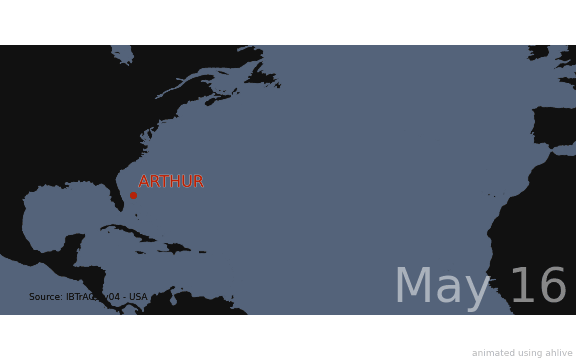

In [1]:
import ahlive as ah
import pandas as pd

# open and subset 2020 Atlantic hurricanes
df = ah.tutorial.open_dataset('tc_tracks', low_memory=False)
df = df.loc[(df['basin'] == 'NA')].sort_index().loc['2020':'2020']
df = df.groupby('name').resample('1D').agg({
    'lat': 'mean', 'lon': 'mean'})
df = df.reset_index().sort_values(['iso_time', 'name'])

# serialize
ah_df = ah.DataFrame(
    df,
    xs='lon',
    ys='lat',
    join='cascade',
    label='name',
    state_labels='iso_time',
    inline_labels='name',
    figsize=(8, 5),
    chart='scatter',
    preset='trail',
    projection='PlateCarree',
    ocean=True,
    land=True,
    style='bare',
    legend=False,
    fps=30,
    frames=4,
    note='Source: IBTrACS v04 - USA',
    workers=4,
    scheduler="processes",
).config(**{
    'preset': {'chart': 'line', 'expire': 5},
    'ocean': {'color': '#54637a'},
    'land': {'color': '#111111'},
    'state': {'color': 'white'}
})

# animate the tracks

ah_df.render()